In [1]:
import tensorflow as tf
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from keras.backend.tensorflow_backend import set_session
config = tf.ConfigProto()
config.gpu_options.per_process_gpu_memory_fraction = 0.18
set_session(tf.Session(config=config))

%matplotlib inline

Using TensorFlow backend.


In [2]:
features = ['Malignancy', 'Diameter', 'Lobulation', 'Spiculation']

In [3]:
%run 'CNNBlocks.ipynb'
%run 'modelArchitectureRegression.ipynb'
%run 'batchGeneratorRegression.ipynb'

In [4]:
validInd = {}
for key in ['random', 'true']:
    validInd[key] = np.load('/home/katya/LungCancer/Katya/CNN_v3_nodule_classification/model_and_weights/valid_inds_'+key+'.npy')

In [5]:
modelPath = '/home/katya/LungCancer/Katya/CNN_v3_nodule_classification/model_and_weights/LUNA_model_v3_regression.h5'
modelPathClass = '/home/katya/LungCancer/Katya/CNN_v3_nodule_classification/model_and_weights/LUNA_model_v3_class.h5'

In [ ]:
print ('Loading positive patches')
xPosTrain, ixPosTrain, xPosValid, ixPosValid = nodulePredictor('true', modelPathClass, validInd)

print ('Loading negative patches')
xNegTrain, ixNegTrain, xNegValid, ixNegValid = nodulePredictor('random', modelPathClass, validInd)

print ('Loading false positive patches')
xFP, ixFP = loadCategory('false')

Loading positive patches


/opt/anaconda/lib/python3.5/site-packages/keras/engine/topology.py:1206: UserWarning: The `Merge` layer is deprecated and will be removed after 08/2017. Use instead layers from `keras.layers.merge`, e.g. `add`, `concatenate`, etc.
  return cls(**config)


The number of samples for true category constitutes 3570
Predicting...
2856/2856 [==============================] - 287s     

In [8]:
#Compiling model with branching on the level of Convolution block #5
model = compileModelDeepBranching((1,64,64,64), dropRate=0.5, regRate=1e-2)

/opt/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:5: UserWarning: Update your `Conv3D` call to the Keras 2 API: `Conv3D(8, (3, 3, 3), kernel_regularizer=<keras.reg..., kernel_initializer="glorot_normal", data_format="channels_first", padding="same")`
/opt/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:12: UserWarning: Update your `MaxPooling3D` call to the Keras 2 API: `MaxPooling3D(data_format="channels_first")`
/opt/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:6: UserWarning: Update your `AveragePooling3D` call to the Keras 2 API: `AveragePooling3D(data_format="channels_first")`
/opt/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:7: UserWarning: The `merge` function is deprecated and will be removed after 08/2017. Use instead layers from `keras.layers.merge`, e.g. `add`, `concatenate`, etc.
/opt/anaconda/lib/python3.5/site-packages/keras/legacy/layers.py:456: UserWarning: The `Merge` layer is deprecated and will be removed after 08/

Compiling model...


/opt/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:10: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(1, kernel_regularizer=<keras.reg..., name="Spiculation", activation="softplus")`
/opt/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:55: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("in..., outputs=[<tf.Tenso...)`


In [ ]:
nbEpochs = 30

model, lossHist = trainRegressionModel(model, modelPath=modelPath, modelPathClass=modelPathClass,
                                       validInd=validInd, posFraction=0.6,
                                       batchSize=30, nbEpoch=nbEpochs, stepsPerEpoch=100)

model.save_weights('/home/katya/LungCancer/Katya/CNN_v3_nodule_classification/model_and_weights/LUNA_model_v3_weights_regression.h5')

/opt/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:45: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(<generator..., steps_per_epoch=100, initial_epoch=0, callbacks=[<keras.ca..., validation_data=<generator..., validation_steps=20, epochs=1)`


Epoch 1/1
100/100 [==============================] - 541s - loss: 7.9439 - Malignancy_loss: 0.3074 - Diameter_loss: 0.1954 - Lobulation_loss: 0.2128 - Spiculation_loss: 0.3492 - val_loss: 5.6258 - val_Malignancy_loss: 0.0922 - val_Diameter_loss: 0.0636 - val_Lobulation_loss: 0.0612 - val_Spiculation_loss: 0.1241

/opt/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:45: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(<generator..., steps_per_epoch=100, initial_epoch=1, callbacks=[<keras.ca..., validation_data=<generator..., validation_steps=20, epochs=2)`


100/100 [==============================] - 502s - loss: 5.0427 - Malignancy_loss: 0.1562 - Diameter_loss: 0.0673 - Lobulation_loss: 0.0841 - Spiculation_loss: 0.1130 - val_loss: 4.0364 - val_Malignancy_loss: 0.0906 - val_Diameter_loss: 0.0554 - val_Lobulation_loss: 0.0590 - val_Spiculation_loss: 0.0535

/opt/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:45: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(<generator..., steps_per_epoch=100, initial_epoch=2, callbacks=[<keras.ca..., validation_data=<generator..., validation_steps=20, epochs=3)`


100/100 [==============================] - 492s - loss: 3.6641 - Malignancy_loss: 0.1360 - Diameter_loss: 0.0503 - Lobulation_loss: 0.0597 - Spiculation_loss: 0.0781 - val_loss: 2.9687 - val_Malignancy_loss: 0.0873 - val_Diameter_loss: 0.0297 - val_Lobulation_loss: 0.0443 - val_Spiculation_loss: 0.0418

/opt/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:45: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(<generator..., steps_per_epoch=100, initial_epoch=3, callbacks=[<keras.ca..., validation_data=<generator..., validation_steps=20, epochs=4)`


100/100 [==============================] - 488s - loss: 2.7444 - Malignancy_loss: 0.1158 - Diameter_loss: 0.0425 - Lobulation_loss: 0.0562 - Spiculation_loss: 0.0660 - val_loss: 2.3185 - val_Malignancy_loss: 0.0926 - val_Diameter_loss: 0.0341 - val_Lobulation_loss: 0.0493 - val_Spiculation_loss: 0.0527

/opt/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:45: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(<generator..., steps_per_epoch=100, initial_epoch=4, callbacks=[<keras.ca..., validation_data=<generator..., validation_steps=20, epochs=5)`


100/100 [==============================] - 514s - loss: 0.7118 - Malignancy_loss: 0.0856 - Diameter_loss: 0.0315 - Lobulation_loss: 0.0428 - Spiculation_loss: 0.0443 - val_loss: 0.6762 - val_Malignancy_loss: 0.0865 - val_Diameter_loss: 0.0292 - val_Lobulation_loss: 0.0433 - val_Spiculation_loss: 0.0482

/opt/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:45: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(<generator..., steps_per_epoch=100, initial_epoch=11, callbacks=[<keras.ca..., validation_data=<generator..., validation_steps=20, epochs=12)`


100/100 [==============================] - 524s - loss: 0.6576 - Malignancy_loss: 0.0887 - Diameter_loss: 0.0323 - Lobulation_loss: 0.0454 - Spiculation_loss: 0.0505 - val_loss: 0.7390 - val_Malignancy_loss: 0.1191 - val_Diameter_loss: 0.0327 - val_Lobulation_loss: 0.0566 - val_Spiculation_loss: 0.0527

/opt/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:45: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(<generator..., steps_per_epoch=100, initial_epoch=12, callbacks=[<keras.ca..., validation_data=<generator..., validation_steps=20, epochs=13)`


100/100 [==============================] - 518s - loss: 0.4534 - Malignancy_loss: 0.0762 - Diameter_loss: 0.0260 - Lobulation_loss: 0.0395 - Spiculation_loss: 0.0422 - val_loss: 0.4603 - val_Malignancy_loss: 0.0806 - val_Diameter_loss: 0.0261 - val_Lobulation_loss: 0.0398 - val_Spiculation_loss: 0.0404

/opt/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:45: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(<generator..., steps_per_epoch=100, initial_epoch=17, callbacks=[<keras.ca..., validation_data=<generator..., validation_steps=20, epochs=18)`


100/100 [==============================] - 524s - loss: 0.4531 - Malignancy_loss: 0.0772 - Diameter_loss: 0.0295 - Lobulation_loss: 0.0387 - Spiculation_loss: 0.0422 - val_loss: 0.5047 - val_Malignancy_loss: 0.0909 - val_Diameter_loss: 0.0383 - val_Lobulation_loss: 0.0488 - val_Spiculation_loss: 0.0477

/opt/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:45: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(<generator..., steps_per_epoch=100, initial_epoch=18, callbacks=[<keras.ca..., validation_data=<generator..., validation_steps=20, epochs=19)`


100/100 [==============================] - 566s - loss: 0.4421 - Malignancy_loss: 0.0779 - Diameter_loss: 0.0295 - Lobulation_loss: 0.0415 - Spiculation_loss: 0.0433 - val_loss: 0.4994 - val_Malignancy_loss: 0.0897 - val_Diameter_loss: 0.0377 - val_Lobulation_loss: 0.0488 - val_Spiculation_loss: 0.0490

/opt/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:45: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(<generator..., steps_per_epoch=100, initial_epoch=19, callbacks=[<keras.ca..., validation_data=<generator..., validation_steps=20, epochs=20)`


100/100 [==============================] - 563s - loss: 0.4489 - Malignancy_loss: 0.0797 - Diameter_loss: 0.0305 - Lobulation_loss: 0.0429 - Spiculation_loss: 0.0458 - val_loss: 0.4578 - val_Malignancy_loss: 0.0857 - val_Diameter_loss: 0.0342 - val_Lobulation_loss: 0.0427 - val_Spiculation_loss: 0.0426

/opt/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:45: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(<generator..., steps_per_epoch=100, initial_epoch=20, callbacks=[<keras.ca..., validation_data=<generator..., validation_steps=20, epochs=21)`


100/100 [==============================] - 558s - loss: 0.4657 - Malignancy_loss: 0.0816 - Diameter_loss: 0.0319 - Lobulation_loss: 0.0417 - Spiculation_loss: 0.0448 - val_loss: 0.5212 - val_Malignancy_loss: 0.1054 - val_Diameter_loss: 0.0293 - val_Lobulation_loss: 0.0435 - val_Spiculation_loss: 0.0412

/opt/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:45: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(<generator..., steps_per_epoch=100, initial_epoch=21, callbacks=[<keras.ca..., validation_data=<generator..., validation_steps=20, epochs=22)`


100/100 [==============================] - 563s - loss: 0.4246 - Malignancy_loss: 0.0795 - Diameter_loss: 0.0280 - Lobulation_loss: 0.0390 - Spiculation_loss: 0.0429 - val_loss: 0.4534 - val_Malignancy_loss: 0.0835 - val_Diameter_loss: 0.0405 - val_Lobulation_loss: 0.0492 - val_Spiculation_loss: 0.0432

/opt/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:45: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(<generator..., steps_per_epoch=100, initial_epoch=22, callbacks=[<keras.ca..., validation_data=<generator..., validation_steps=20, epochs=23)`


100/100 [==============================] - 552s - loss: 0.4315 - Malignancy_loss: 0.0817 - Diameter_loss: 0.0291 - Lobulation_loss: 0.0401 - Spiculation_loss: 0.0412 - val_loss: 0.6266 - val_Malignancy_loss: 0.1382 - val_Diameter_loss: 0.0312 - val_Lobulation_loss: 0.0482 - val_Spiculation_loss: 0.0497

/opt/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:45: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(<generator..., steps_per_epoch=100, initial_epoch=23, callbacks=[<keras.ca..., validation_data=<generator..., validation_steps=20, epochs=24)`


 80/100 [=======================>......] - ETA: 95s - loss: 0.4187 - Malignancy_loss: 0.0779 - Diameter_loss: 0.0287 - Lobulation_loss: 0.0379 - Spiculation_loss: 0.0422 

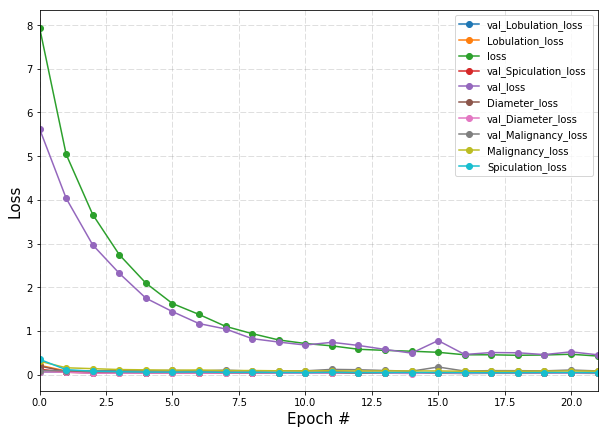

In [19]:
plt.figure(figsize=[10,7])
plt.grid(True, ls='--', lw=0.5, alpha=0.5, dash_capstyle = 'round', c='gray')
plt.xlabel('Epoch #', fontsize=15)
plt.ylabel('Loss', fontsize=15)

labels=list(lossHist.keys())

for i,key in enumerate(lossHist):
    plt.plot([x for x in range(nbEpochs)], lossHist[key], 'o-', label=labels[i])
    plt.legend()
    plt.xlim([0,21])
    
plt.savefig('/home/katya/LungCancer/Katya/CNN_v3_nodule_classification/figures/' + str(version) + '.png')

In [11]:
version = 2.5

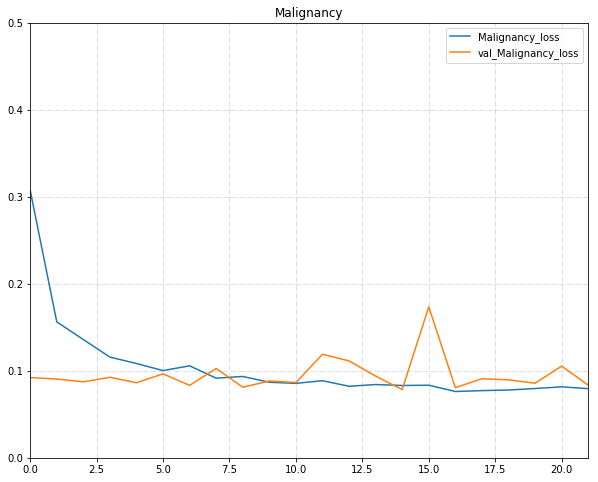

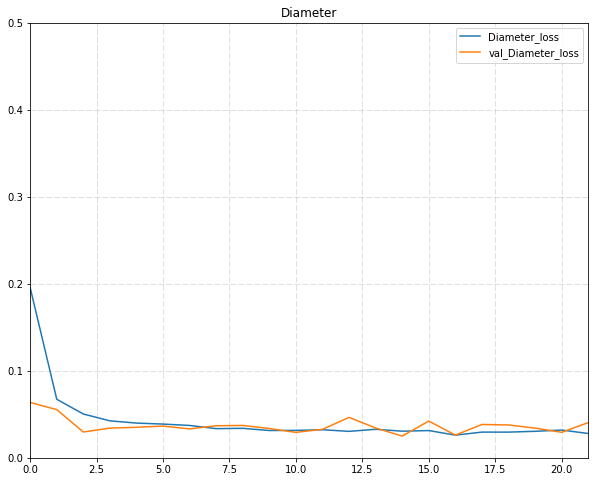

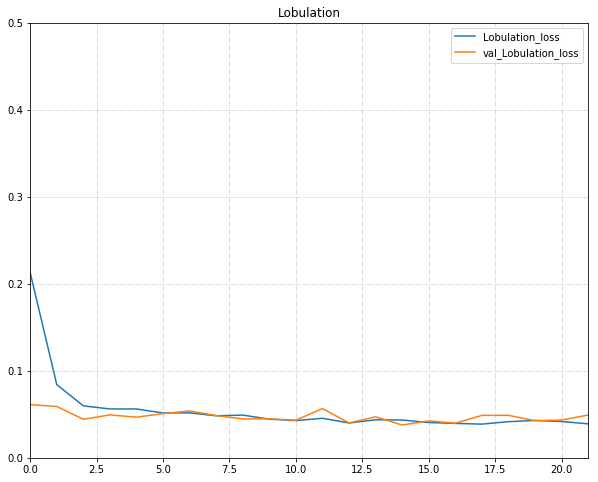

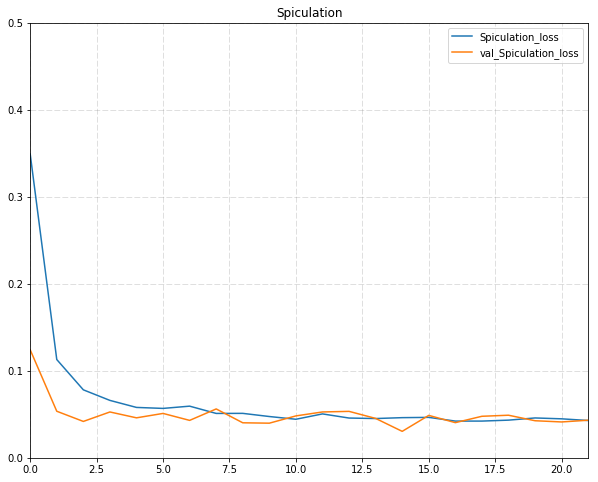

In [18]:
for feature in features:
    plt.figure(figsize=[10,8])
    plt.grid(True, ls='--', lw=0.5, alpha=0.5, dash_capstyle = 'round', c='gray')

    plt.plot([x for x in range(nbEpochs)], lossHist[feature+'_loss'], label=feature+'_loss')
    plt.plot([x for x in range(nbEpochs)], lossHist['val_'+feature+'_loss'], label='val_'+feature+'_loss')
    plt.title(feature)
    plt.ylim([0,0.5])
    plt.xlim([0,21])
    plt.legend()
    plt.savefig('/home/katya/LungCancer/Katya/CNN_v3_nodule_classification/figures/'+str(version)+'.'+feature+'.png')